In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import joblib

plt.style.use("seaborn-v0_8-muted")

In [37]:
data_path = Path("../data/processed/cleaned_gravity_speed_data.csv")
model_path = Path("../models/rf_model.joblib")

df = pd.read_csv(data_path)
model = joblib.load(model_path)

print(f"✅ Data shape: {df.shape}")


✅ Data shape: (1000, 9)


In [38]:
target_col = "combined_dilation"

features = df.select_dtypes(include=[np.number]).drop(columns=[target_col]).columns
X = df[features]

df[f"{target_col}_pred"] = model.predict(X)


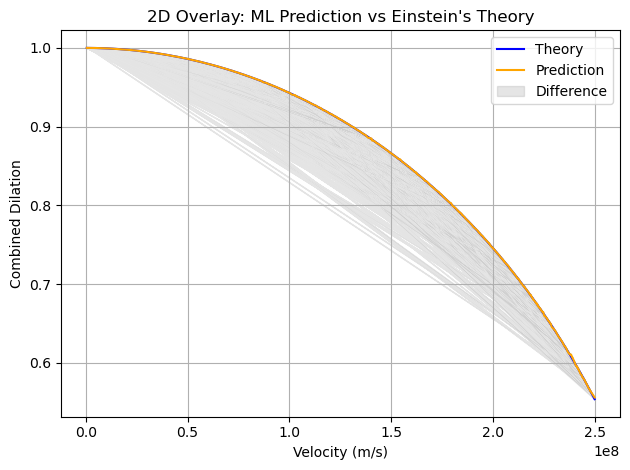

In [39]:
sns.lineplot(data=df, x="velocity_m_s", y=target_col, label="Theory", color="blue")
sns.lineplot(data=df, x="velocity_m_s", y=f"{target_col}_pred", label="Prediction", color="orange")

plt.fill_between(df["velocity_m_s"],
                 df[target_col],
                 df[f"{target_col}_pred"],
                 color="gray", alpha=0.2, label="Difference")

plt.xlabel("Velocity (m/s)")
plt.ylabel("Combined Dilation")
plt.title("2D Overlay: ML Prediction vs Einstein's Theory")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

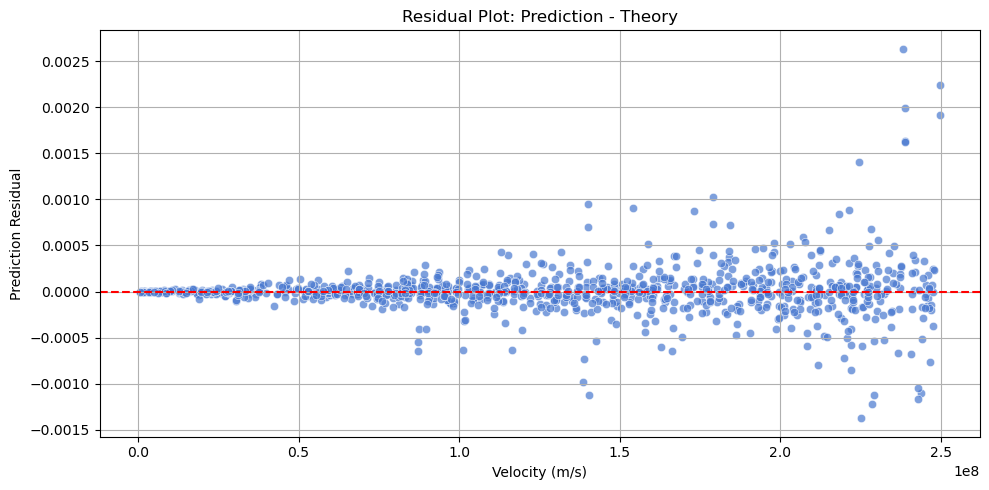

In [40]:
df["residual"] = df[f"{target_col}_pred"] - df[target_col]

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["velocity_m_s"], y=df["residual"], alpha=0.7)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Prediction Residual")
plt.title("Residual Plot: Prediction - Theory")
plt.grid(True)
plt.tight_layout()
plt.show()


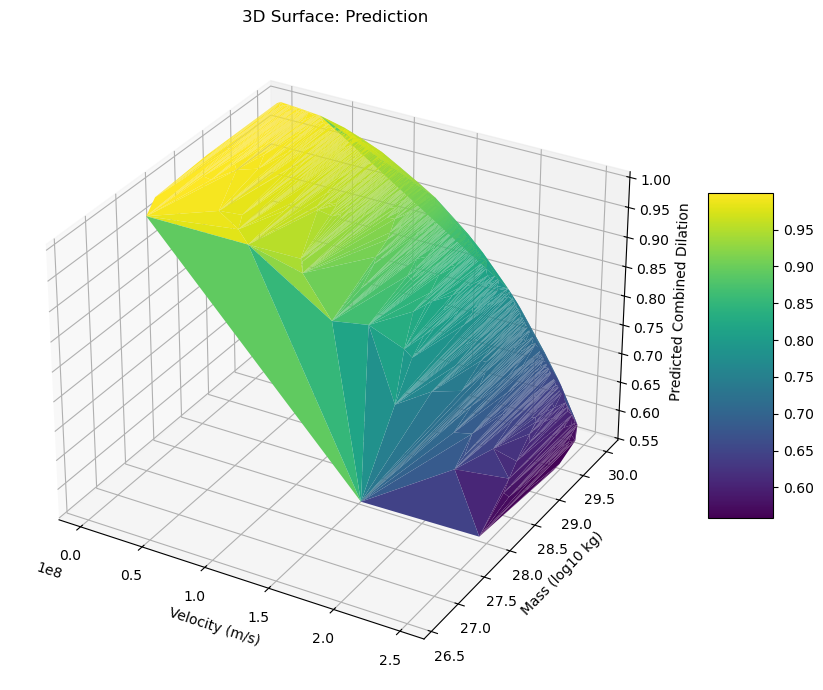

In [41]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Create 3D axes

x = df["velocity_m_s"]
y = np.log10(df["mass_kg"])
z = df[f"{target_col}_pred"]

surf = ax.plot_trisurf(x, y, z, cmap=cm.viridis, linewidth=0.2, antialiased=True)

ax.set_xlabel("Velocity (m/s)")
ax.set_ylabel("Mass (log10 kg)")
ax.set_zlabel("Predicted Combined Dilation")
ax.set_title("3D Surface: Prediction")
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [42]:
output_dir = Path("../reports/report_files")
output_dir.mkdir(parents=True, exist_ok=True)

df.to_csv(output_dir / "gravity_predictions_vs_theory.csv", index=False)
print(f"✅ Saved merged prediction results to {output_dir}")


✅ Saved merged prediction results to ..\reports\report_files
